In [1]:
import os
import pandas as pd
import numpy as np

AGEC_LVSTK = pd.read_hdf(os.path.join("input", "agec_lvstk.h5"))

In [2]:
AGEC_LVSTK[('Q3', 'BEEF')].unique()

array([       nan, 0.3371435 , 0.33714348, 0.33714354, 0.        ],
      dtype=float32)

In [3]:
AGEC_LVSTK[('Q1', 'BEEF')].replace(0, np.nan).mean()

0.23324002

In [4]:
AGGHG_LVSTK = pd.read_hdf(os.path.join("input", "agGHG_lvstk.h5"))
LVSTK_GHG_SCOPE_1 = ['CO2E_KG_HEAD_DUNG_URINE', 'CO2E_KG_HEAD_ENTERIC', 'CO2E_KG_HEAD_IND_LEACH_RUNOFF', 'CO2E_KG_HEAD_MANURE_MGT']

In [5]:
ghg_raw = AGGHG_LVSTK.loc[:, (AGGHG_LVSTK.columns.get_level_values(0) == 'BEEF') &
                                          (AGGHG_LVSTK.columns.get_level_values(1).isin(LVSTK_GHG_SCOPE_1))]

In [6]:
ghg_raw.replace(0, np.nan).mean().sum()

1312.2584

In [7]:
print(ghg_raw.index.name)

CELL_ID


In [8]:
ghg_raw

LIVESTOCK                    BEEF                       \
INDICATOR CO2E_KG_HEAD_DUNG_URINE CO2E_KG_HEAD_ENTERIC   
CELL_ID                                                  
0                       72.114067          1517.869263   
1                       72.114067          1517.869263   
2                       72.114067          1517.869263   
3                       72.114067          1517.869263   
4                       72.114067          1517.869263   
...                           ...                  ...   
6956402                142.094345          1478.710938   
6956403                142.094345          1478.710938   
6956404                142.094345          1478.710938   
6956405                142.094345          1478.710938   
6956406                142.094345          1478.710938   

LIVESTOCK                                                        
INDICATOR CO2E_KG_HEAD_IND_LEACH_RUNOFF CO2E_KG_HEAD_MANURE_MGT  
CELL_ID                                                          
0                             94.956848                1.160493  
1                             94.956848                1.160493  
2                             94.956848                1.160493  
3                             94.956848                1.160493  
4                             94.956848                1.160493  
...                                 ...                     ...  
6956402                      124.750061                0.239355  
6956403                      124.750061                0.239355  
6956404                      124.750061                0.239355  
6956405                      124.750061                0.239355  
6956406                      124.750061                0.239355  

[6956407 rows x 4 columns]

In [9]:
ghg_lvstk_irr = pd.read_hdf(os.path.join('input', "agGHG_irrpast.h5"))
ghg_lvstk_irr_cols = [i for i in ghg_lvstk_irr.columns if 'CO2E' in i]


In [10]:
ghg_lvstk_irr

,CELL_ID,SA2_ID,CO2E_KG_HA_CHEM_APPL,CO2E_KG_HA_CROP_MGT,CO2E_KG_HA_CULTIV,CO2E_KG_HA_FERT_PROD,CO2E_KG_HA_HARVEST,CO2E_KG_HA_IRRIG,CO2E_KG_HA_PEST_PROD,CO2E_KG_HA_SOIL,CO2E_KG_HA_SOWING
0,0,315011401,34.903072,0.0,100.437172,242.705811,0,60.667500,69.146484,494.568451,16.632257
1,1,315011401,34.903072,0.0,100.437172,242.705811,0,60.667500,69.146484,494.568451,16.632257
2,2,315011401,34.903072,0.0,100.437172,242.705811,0,60.667500,69.146484,494.568451,16.632257
3,3,315011401,34.903072,0.0,100.437172,242.705811,0,60.667500,69.146484,494.568451,16.632257
4,4,315011401,34.903072,0.0,100.437172,242.705811,0,60.667500,69.146484,494.568451,16.632257
...,...,...,...,...,...,...,...,...,...,...,...
6956402,6956402,603011068,37.309490,0.0,105.426018,233.414490,0,54.931358,62.463970,457.433319,16.736914
6956403,6956403,603011068,37.309490,0.0,105.426018,233.414490,0,54.931358,62.463970,457.433319,16.736914
6956404,6956404,603011068,37.309490,0.0,105.426018,233.414490,0,54.931358,62.463970,457.433319,16.736914
6956405,6956405,603011068,37.309490,0.0,105.426018,233.414490,0,54.931358,62.463970,457.433319,16.736914


In [11]:
ghg_lvstk_irr.replace(0, np.nan).mean().sum()

434890675.2988826

In [12]:
# 从第3列开始（索引2开始）
ghg_lvstk_irr.iloc[:, 2:].replace(0, np.nan).mean().sum()

1045.7231349945068

In [13]:
print(ghg_lvstk_irr.iloc[:, 2:].replace(0, np.nan).mean())

CO2E_KG_HA_CHEM_APPL     33.708797
CO2E_KG_HA_CROP_MGT            NaN
CO2E_KG_HA_CULTIV        93.536942
CO2E_KG_HA_FERT_PROD    251.398300
CO2E_KG_HA_HARVEST             NaN
CO2E_KG_HA_IRRIG         58.103741
CO2E_KG_HA_PEST_PROD     66.120903
CO2E_KG_HA_SOIL         522.356873
CO2E_KG_HA_SOWING        20.497580
dtype: float64


In [14]:
print(ghg_raw.replace(0, np.nan).mean())

LIVESTOCK  INDICATOR                    
BEEF       CO2E_KG_HEAD_DUNG_URINE            73.922371
           CO2E_KG_HEAD_ENTERIC             1193.667358
           CO2E_KG_HEAD_IND_LEACH_RUNOFF      44.084389
           CO2E_KG_HEAD_MANURE_MGT             0.584321
dtype: float32


In [15]:
AG_TO_DESTOCKED_NATURAL_COSTS_HA = np.load(os.path.join('input', "ag_to_destock_tmatrix.npy"))
AG_TO_DESTOCKED_NATURAL_COSTS_HA_old = np.load(os.path.join(r'N:\LUF-Modelling\LUTO2_XH\upload_data\input', "ag_to_destock_tmatrix.npy"))

In [16]:
AG_TO_DESTOCKED_NATURAL_COSTS_HA

array([  nan,   nan, 2000.,   nan,   nan,   nan, 2000.,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan, 2000.,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan])

In [17]:
AG_TO_DESTOCKED_NATURAL_COSTS_HA_old

array([  nan,   nan, 3500.,   nan,   nan,   nan, 3500.,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan, 3500.,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan])

In [18]:
EP_EST_COST_HA = pd.read_hdf(os.path.join('input', "ep_est_cost_ha.h5")).to_numpy(dtype=np.float32)

In [19]:
EP_EST_COST_HA.min(), EP_EST_COST_HA.mean()

(1155.1299, 2398.8042)

In [20]:
EP_EST_COST_HA_old = pd.read_hdf(os.path.join(r'N:\LUF-Modelling\LUTO2_XH\upload_data\input', "ep_est_cost_ha.h5")).to_numpy(dtype=np.float32)

In [21]:
EP_EST_COST_HA_old.min()

1155.1299

In [22]:
from luto.tools.write import write_outputs
import luto.simulation as sim
from luto import settings

save_dir = r"output\20260210_Paper1_Results_aquila_test\Run_1_GHG_low_BIO_low\output\2026_02_13__06_14_27_RF13_2010-2050"
data = sim.load_data_from_disk(f"{save_dir}/Data_RES{settings.RESFACTOR}.lz4")

2026-02-20 10:28:06 - Loading data from output\20260210_Paper1_Results_aquila_test\Run_1_GHG_low_BIO_low\output\2026_02_13__06_14_27_RF13_2010-2050/Data_RES13.lz4...



In [23]:
data.T_MAT.sel(from_lu=data.AGRICULTURAL_LANDUSES, to_lu='Destocked - natural land').values

array([  nan,   nan, 2000.,   nan,   nan,   nan, 2000.,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan, 2000.,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan])

In [24]:
data.T_MAT.sel(from_lu=data.AGRICULTURAL_LANDUSES, to_lu='Environmental Plantings').values

array([3680., 1500.,   nan, 3680., 3680., 1500.,   nan, 3680., 1500.,
       3680., 3680., 3680., 3680., 3680., 1500.,   nan, 3680., 3680.,
       1500., 1500., 1500., 3680., 1500.,   nan, 3680., 1500., 1500.,
       1500.])

In [25]:
data.T_MAT.sel(from_lu=data.AGRICULTURAL_LANDUSES, to_lu='Carbon Plantings (Block)').values

array([3680., 1500.,   nan, 3680., 3680., 1500.,   nan, 3680., 1500.,
       3680., 3680., 3680., 3680., 3680., 1500.,   nan, 3680., 3680.,
       1500., 1500., 1500., 3680., 1500.,   nan, 3680., 1500., 1500.,
       1500.])

In [26]:
data.T_MAT.sel(from_lu=data.AGRICULTURAL_LANDUSES, to_lu='Beef Carbon Plantings (Belt)').values

array([3680., 1500.,   nan, 3680., 3680., 1500.,   nan, 3680., 1500.,
       3680., 3680., 3680., 3680., 3680., 1500.,   nan, 3680., 3680.,
       1500., 1500., 1500., 3680., 1500.,   nan, 3680., 1500., 1500.,
       1500.])

In [27]:
print(data.T_MAT)

<xarray.DataArray (from_lu: 37, to_lu: 37)> Size: 11kB
array([[    0., 10180.,    nan, ...,  3680.,  3680.,    nan],
       [41500.,     0.,    nan, ...,  1500.,  1500.,    nan],
       [58210., 23210.,     0., ...,    nan,    nan,  2000.],
       ...,
       [58210., 23210.,    nan, ...,     0.,    nan,    nan],
       [58210., 23210.,    nan, ...,    nan,     0.,    nan],
       [58210., 23210.,  6500., ...,    nan,    nan,     0.]])
Coordinates:
  * from_lu  (from_lu) <U29 4kB 'Apples' ... 'Destocked - natural land'
  * to_lu    (to_lu) <U29 4kB 'Apples' ... 'Destocked - natural land'


In [28]:
data.CP_EST_COST_HA.min(), data.CP_EST_COST_HA.mean()

(3900.5786, 4904.5537)

In [29]:
data.EP_EST_COST_HA.min(), data.EP_EST_COST_HA.mean()

(1458.1204, 2527.1155)

In [30]:
data.EP_BLOCK_AVG_T_CO2_HA_PER_YR.min(),data.EP_BLOCK_AVG_T_CO2_HA_PER_YR.max(),data.EP_BLOCK_AVG_T_CO2_HA_PER_YR.mean(),

(-0.821421, 79.71021, 3.675571)

In [31]:
data.CP_BLOCK_AVG_T_CO2_HA_PER_YR.min(),data.CP_BLOCK_AVG_T_CO2_HA_PER_YR.max(),data.CP_BLOCK_AVG_T_CO2_HA_PER_YR.mean(),

(0.6031408, 63.91553, 10.7266245)

In [32]:
data.CP_BELT_AVG_T_CO2_HA_PER_YR.min(),data.CP_BELT_AVG_T_CO2_HA_PER_YR.max(),data.CP_BELT_AVG_T_CO2_HA_PER_YR.mean(),

(-0.6048621, 81.93779, 9.531056)

In [33]:
df = data.T_MAT.to_dataframe(name='cost').unstack()
df

cost                                                                                                                                                                                                                                                                                                                                                                                                                                          \
to_lu                              Apples Beef - modified land Beef - natural land      Citrus      Cotton Dairy - modified land Dairy - natural land      Grapes         Hay        Nuts Other non-cereal crops       Pears Plantation fruit        Rice Sheep - modified land Sheep - natural land Stone fruit       Sugar Summer cereals Summer legumes Summer oilseeds Tropical stone fruit Unallocated - modified land Unallocated - natural land  Vegetables Winter cereals   
from_lu                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
Apples                             0.0000          10,180.0000                 NaN 45,180.0000 35,180.0000           17,180.0000                  NaN 45,180.0000 11,180.0000 45,180.0000            35,180.0000 45,180.0000      45,180.0000 35,180.0000           10,180.0000                  NaN 45,180.0000 35,180.0000    11,180.0000    11,180.0000     11,180.0000          45,180.0000                  5,180.0000                        NaN 35,180.0000    11,180.0000   
Beef - modified land          41,500.0000               0.0000                 NaN 41,500.0000 31,500.0000           13,500.0000                  NaN 41,500.0000  7,500.0000 41,500.0000            31,500.0000 41,500.0000      41,500.0000 31,500.0000            6,500.0000                  NaN 41,500.0000 31,500.0000     7,500.0000     7,500.0000      7,500.0000          41,500.0000                  1,500.0000                        NaN 31,500.0000     7,500.0000   
Beef - natural land           58,210.0000          23,210.0000              0.0000 58,210.0000 48,210.0000           30,210.0000          13,500.0000 58,210.0000 24,210.0000 58,210.0000            48,210.0000 58,210.0000      58,210.0000 48,210.0000           23,210.0000           6,500.0000 58,210.0000 48,210.0000    24,210.0000    24,210.0000     24,210.0000          58,210.0000                         NaN                        NaN 48,210.0000    24,210.0000   
Citrus                        45,180.0000          10,180.0000                 NaN      0.0000 35,180.0000           17,180.0000                  NaN 45,180.0000 11,180.0000 45,180.0000            35,180.0000 45,180.0000      45,180.0000 35,180.0000           10,180.0000                  NaN 45,180.0000 35,180.0000    11,180.0000    11,180.0000     11,180.0000          45,180.0000                  5,180.0000                        NaN 35,180.0000    11,180.0000   
Cotton                        45,180.0000          10,180.0000                 NaN 45,180.0000      0.0000           17,180.0000                  NaN 45,180.0000 11,180.0000 45,180.0000            35,180.0000 45,180.0000      45,180.0000 35,180.0000           10,180.0000                  NaN 45,180.0000 35,180.0000    11,180.0000    11,180.0000     11,180.0000          45,180.0000                  5,180.0000                        NaN 35,180.0000    11,180.0000   
Dairy - modified land         41,500.0000           6,500.0000                 NaN 41,500.0000 31,500.0000                0.0000                  NaN 41,500.0000  7,500.0000 41,500.0000            31,500.0000 41,500.0000      41,500.0000 31,500.0000            6,500.0000              

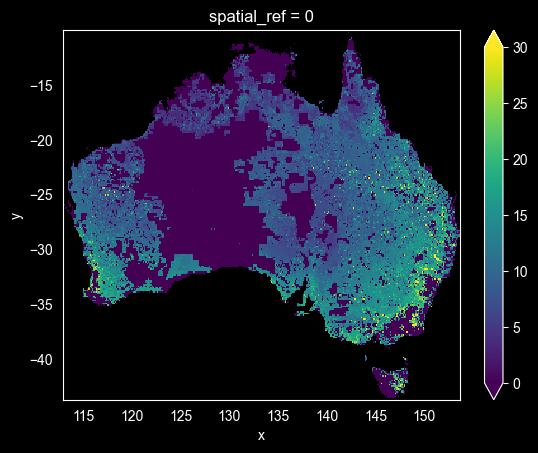

In [42]:
cp_belt_block = data.CP_BELT_AVG_T_CO2_HA_PER_YR - data.CP_BLOCK_AVG_T_CO2_HA_PER_YR
from luto.tools.Manual_jupyter_books.helpers import arr_to_xr
arr_to_xr(data, data.CP_BLOCK_AVG_T_CO2_HA_PER_YR).plot(vmin=0, vmax=30)

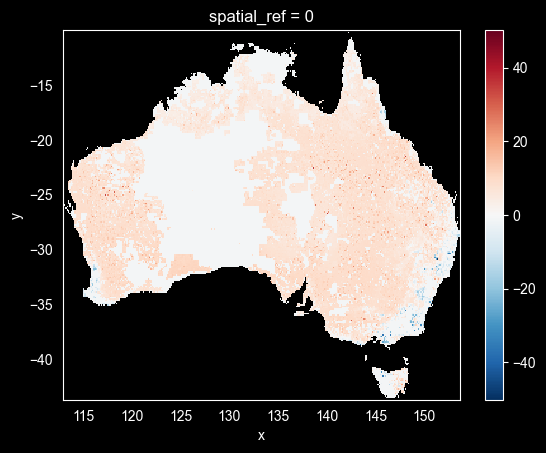

In [35]:
arr_to_xr(data, data.CP_BLOCK_AVG_T_CO2_HA_PER_YR-data.EP_BLOCK_AVG_T_CO2_HA_PER_YR).plot()

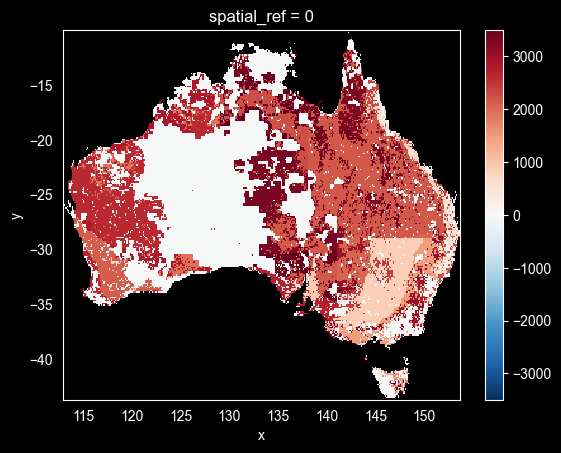

In [36]:
arr_to_xr(data, data.CP_EST_COST_HA-data.EP_EST_COST_HA).plot()

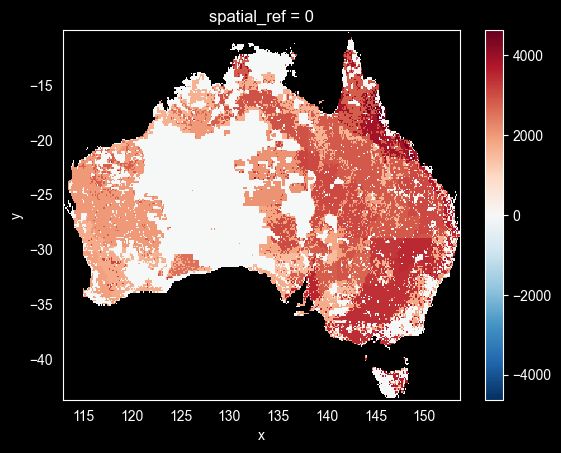

In [37]:
arr_to_xr(data, data.EP_EST_COST_HA).plot()

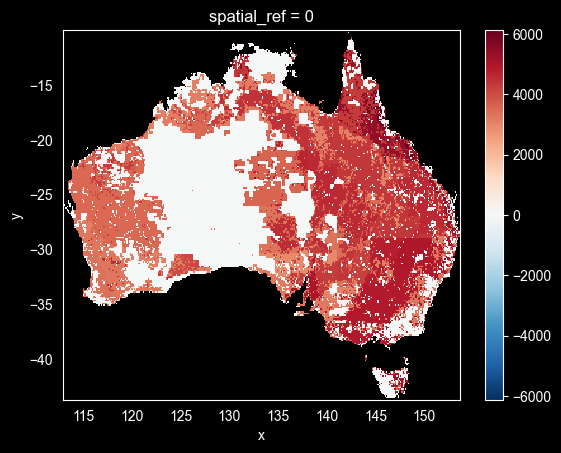

In [38]:
arr_to_xr(data, data.EP_EST_COST_HA+1500).plot()